In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
X = data['data']
Y = data['target']

In [6]:
feature_names = data['feature_names']
class_names = data['target_names']

In [7]:
X = pd.DataFrame(X, columns=feature_names)

In [9]:
X.shape

(569, 30)

In [10]:
Y = pd.DataFrame(Y)

In [12]:
class_names

array(['malignant', 'benign'], dtype='<U9')

In [44]:
class_names = ['M', 'B']

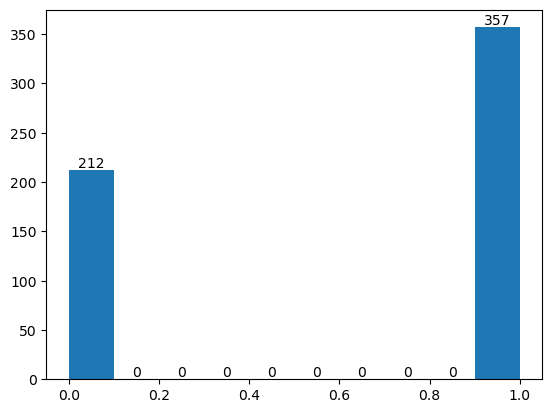

In [15]:
_, _, bins = plt.hist(Y)
plt.bar_label(bins)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X_train)

StandardScaler()

In [21]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=feature_names)

In [22]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)

In [25]:
pca.fit(X_train)

PCA(n_components=2)

In [26]:
pca_names = [f'pca_{i}' for i in range(pca.n_components_)]

In [27]:
pca_names

['pca_0', 'pca_1']

In [29]:
pca.components_.shape

(2, 30)

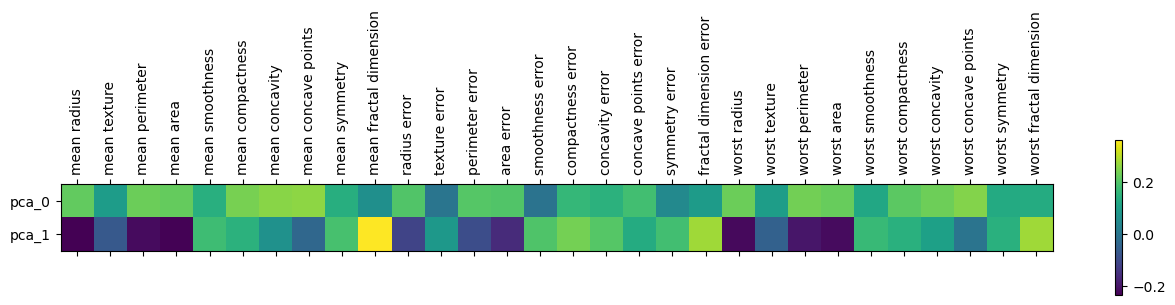

In [30]:
plt.matshow(pca.components_)
plt.xticks(ticks=range(pca.components_.shape[1]), labels=feature_names, rotation='vertical')
plt.yticks(ticks=range(pca.n_components_), labels=pca_names)
plt.colorbar()
plt.show()

In [31]:
# objasnjena varijansa za svaku od komponenti
pca.explained_variance_

array([13.19960138,  5.86946172])

In [32]:
# udeo obajsnjene varijanse za svaku od komponenti
pca.explained_variance_ratio_

array([0.43895388, 0.19518945])

In [33]:
X_train_pca = pca.transform(X_train)

In [35]:
X_test_pca = pca.transform(X_test)

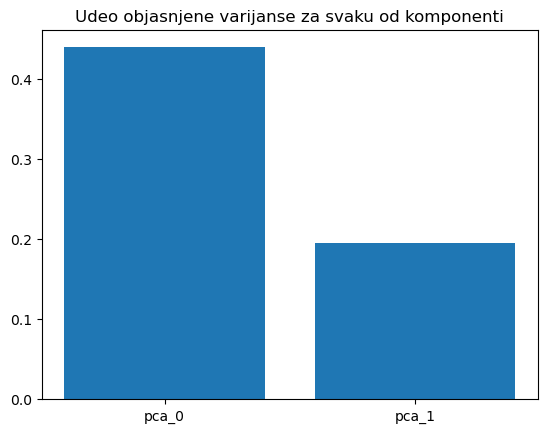

In [36]:
plt.bar(x=pca_names, height=pca.explained_variance_ratio_)
plt.title('Udeo objasnjene varijanse za svaku od komponenti')
plt.show()

In [37]:
cummulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

In [38]:
cummulative_variance_ratio

array([0.43895388, 0.63414333])

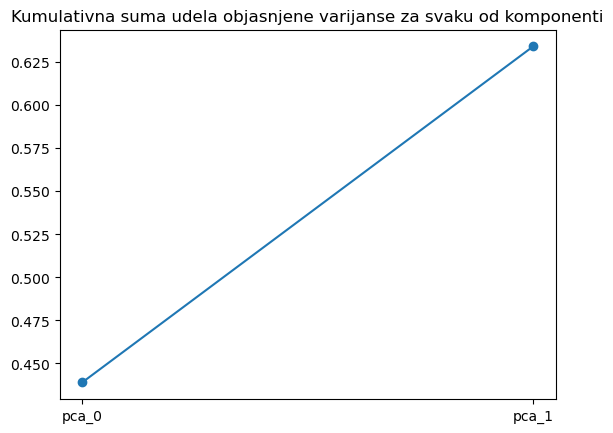

In [39]:
plt.plot(pca_names, cummulative_variance_ratio, marker='o')
plt.title('Kumulativna suma udela objasnjene varijanse za svaku od komponenti')
plt.show()

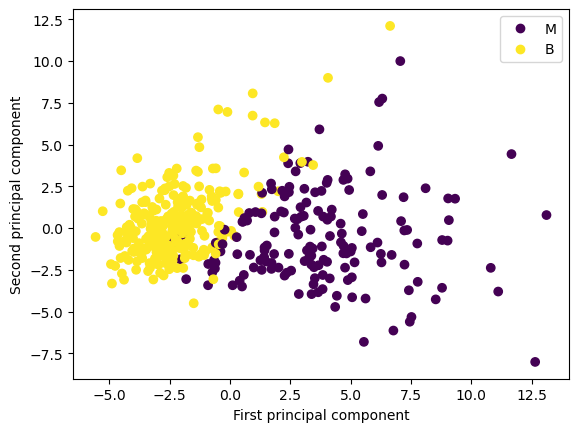

In [45]:
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:,1], c=y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
plt.show()